In [38]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [39]:
df = pd.read_csv('/amazon.csv', encoding='latin1')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [41]:
month_map = {
   'Janeiro': 'January', 'Fevereiro': 'February', 'Março': 'March',
   'Abril': 'April', 'Maio': 'May', 'Junho': 'June',
   'Julho': 'July', 'Agosto': 'August', 'Setembro': 'September',
   'Outubro': 'October', 'Novembro': 'November', 'Dezembro': 'December'
}

df['month'] = df['month'].map(month_map)
df['date'] = pd.to_datetime(df['month'] + ' ' + df['year'].astype(str), format='%B %Y')
df.set_index('date', inplace=True)

**Histogram**

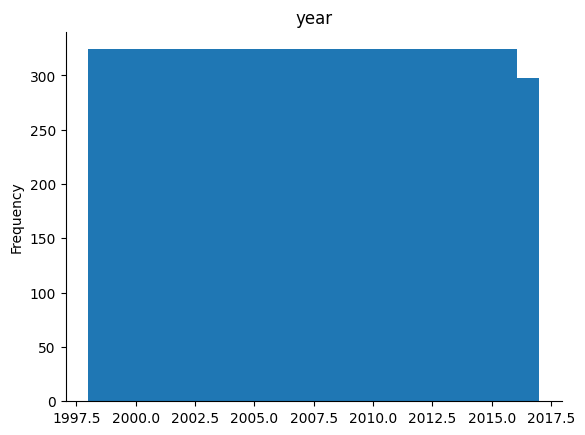

In [42]:
df['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Line Chart**

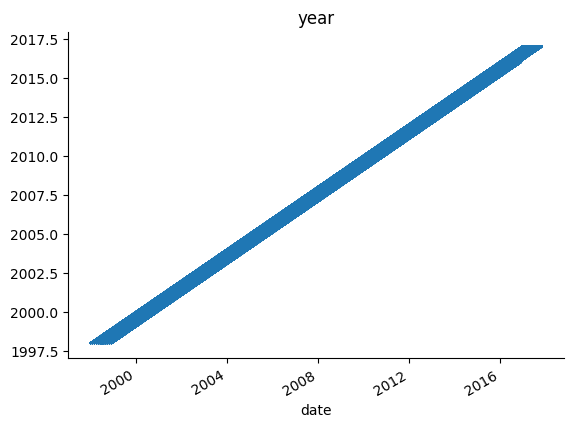

In [43]:
df['year'].plot(kind='line', title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Box plot**

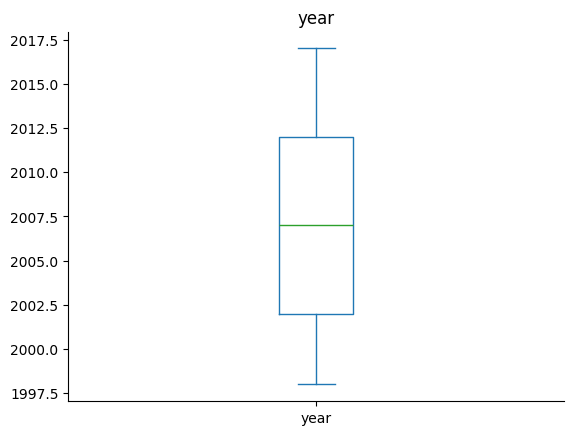

In [44]:
df['year'].plot(kind='box', title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Heatmap**

In [45]:
numerical_df = df.select_dtypes(include=['number'])
numerical_df.corr().style.background_gradient(cmap='coolwarm')

,year,number
year,1.000000,0.065201
number,0.065201,1.000000


**Autocorrelation Plot**

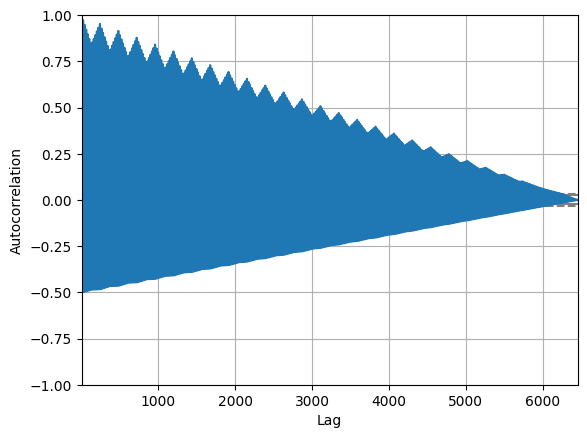

In [46]:
autocorrelation_plot(df['year'])
plt.show()

**Partial Autocorrelation Plot**

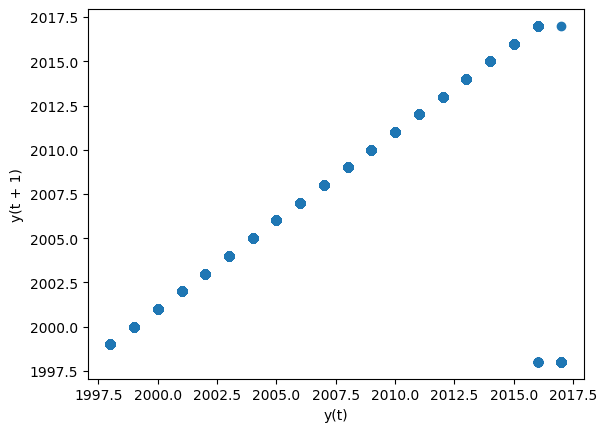

In [47]:
lag_plot(df['year'])
plt.show()

**Seasonal Decomposition Plot**

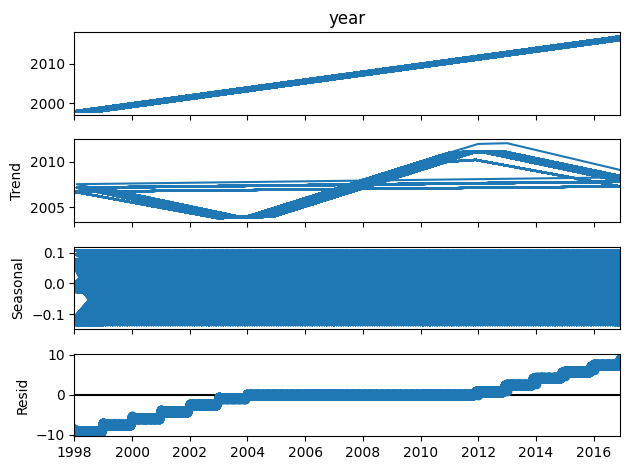

In [48]:
result = seasonal_decompose(df['year'], model='additive', period=12)
result.plot()
plt.show()